# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage,dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [2]:
df =pd.read_csv('marketing.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [5]:
df.isnull().sum()/len(df)*100
df['Income'].fillna(df['Income'].mean(),inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [6]:
len(df[df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [7]:
df= df.drop(columns=['ID', 'Dt_Customer'],axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [8]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [9]:
df['Marital_Status']= df['Marital_Status'].replace(['Married', 'Together'], 'relationship')
df['Marital_Status']= df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [10]:
df['Total_Expenses']= df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [11]:
df['Num_Total_Purchases']= df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [12]:
df['kids']= df['Kidhome']+df['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [13]:
df['TotalAcceptedCmp']= df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [14]:
col_del = ["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response", "NumWebVisitsMonth","NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumDealsPurchases", "Kidhome", "Teenhome", 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df = df.drop(columns=col_del, axis=1)
df.head()

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [15]:
from datetime import date
df['Age']= date.today().year - df['Year_Birth']
df['Age']

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64

### 13. Encode the categorical variables in the dataset

In [16]:
# label encoding
cate= ['Education', 'Marital_Status']
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

### 14. Standardize the columns, so that values are in a particular range

In [17]:
#Standardization
df1= df.copy()
scaled_features= StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame()

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [18]:
#step 1: Calculate the covariance matrix
cov_matrix = np.cov(scaled_features.T)
cov_matrix

array([[ 1.00044663, -0.17146685,  0.0042384 , -0.16101378, -0.01987996,
        -0.030141  , -0.11135611, -0.16837908, -0.09023955,  0.00830618,
        -1.00044663],
       [-0.17146685,  1.00044663, -0.01375403,  0.1200273 , -0.01173369,
        -0.05056252,  0.09209518,  0.09405439,  0.05321304,  0.06327892,
         0.17146685],
       [ 0.0042384 , -0.01375403,  1.00044663,  0.00463847, -0.00450972,
        -0.00520466, -0.01775232,  0.00671037,  0.03917598, -0.06004206,
        -0.0042384 ],
       [-0.16101378,  0.1200273 ,  0.00463847,  1.00044663, -0.00394826,
        -0.02723528,  0.66500337,  0.5636214 , -0.29084155,  0.28717443,
         0.16101378],
       [-0.01987996, -0.01173369, -0.00450972, -0.00394826,  1.00044663,
         0.01323699,  0.02044173,  0.00574294,  0.01806145, -0.08900203,
         0.01987996],
       [-0.030141  , -0.05056252, -0.00520466, -0.02723528,  0.01323699,
         1.00044663, -0.03707503, -0.02059185,  0.03108014, -0.01761676,
         0.030

In [19]:
# step 2 - calculate the eigen values and eigen vectors
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigen values : \n', eig_vals)
print("\n")
print('eigen vectors \n', eig_vectors)

eigen values : 
 [2.90115857e+00 2.02877417e+00 3.35971572e-18 1.62682101e-01
 4.46483244e-01 7.09128521e-01 7.57385458e-01 9.21118374e-01
 1.05250230e+00 1.00067297e+00 1.02500720e+00]


eigen vectors 
 [[-2.26007137e-01  6.30559578e-01 -7.07106781e-01 -7.72858267e-04
  -6.47062030e-03  3.93193267e-02 -1.11488151e-01  1.73747015e-01
   2.51202615e-02 -3.74408912e-02 -7.12491103e-02]
 [ 1.21459974e-01 -1.79219028e-01  9.36706366e-17 -1.13765653e-02
   4.93455838e-02 -2.98204282e-01  9.56926998e-02  7.41831115e-01
   4.62461653e-01 -2.15231716e-01 -2.04870302e-01]
 [-1.93533541e-02 -1.69350097e-02  7.54318912e-17 -7.00507722e-04
   7.77966778e-03 -1.12060861e-02  2.49059931e-01  7.08069614e-02
  -1.99267837e-01  6.23044269e-01 -7.10081513e-01]
 [ 4.59300692e-01  7.50809984e-02  1.54706393e-17 -1.73593142e-01
  -8.06162484e-01  6.27989251e-02 -2.89244838e-01  6.73122872e-02
  -5.12871229e-02  1.44440367e-02 -9.16349472e-02]
 [-6.83738842e-03 -4.13678734e-02 -7.48915628e-18 -3.96024497e-0

In [20]:
#step3 
total = sum(eig_vals)
print(total)
var_exp =[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance : ',var_exp)
print('Cumulative Variance Explained : ', cum_var_exp)

11.00491290754801
Explained Variance :  [26.362394593625154, 18.435167922908395, 9.563931199141571, 9.31408737482907, 9.092965792386476, 8.370065097247657, 6.882248537324208, 6.443744964265566, 4.057126560104286, 1.4782679581676015, 3.0529234982155913e-17]
Cumulative Variance Explained :  [ 26.36239459  44.79756252  54.36149372  63.67558109  72.76854688
  81.13861198  88.02086052  94.46460548  98.52173204 100.
 100.        ]


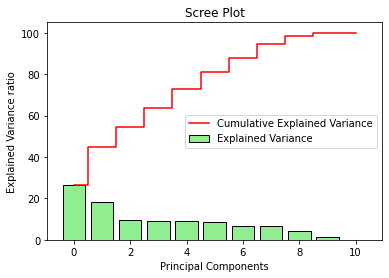

In [21]:
##Scree plot
plt.bar(range(11), var_exp, align = 'center', color = 'lightgreen', edgecolor ='black', label= "Explained Variance")
plt.step(range(11), cum_var_exp, where='mid', color= 'red', label = "Cumulative Explained Variance")
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [22]:
#scikit learn principal component analysis method
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features),columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,2.591850,0.259492,0.319757,1.095694,-0.887807,-0.899935,-0.081143,-0.303630
1,-1.160498,2.233169,-0.539871,1.168076,-0.493261,-0.646596,0.422761,0.570480
2,1.184733,-0.127851,0.131873,-0.368945,1.017667,-0.726192,0.461217,-1.055560
3,-2.165976,-1.266584,-0.410350,-0.363349,0.871146,-0.053248,-0.008198,-0.317195
4,-0.275963,-0.839385,0.510783,-1.644183,-0.978943,1.635894,0.113430,-0.293728


In [23]:
pd.Series(pca.explained_variance_ratio_).cumsum()*100

0    26.362395
1    44.797563
2    54.361494
3    63.675581
4    72.768547
5    81.138612
6    88.020861
7    94.464605
dtype: float64

In [24]:
cluster_errors=[]
cluster_range= range(2,10)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state = 100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

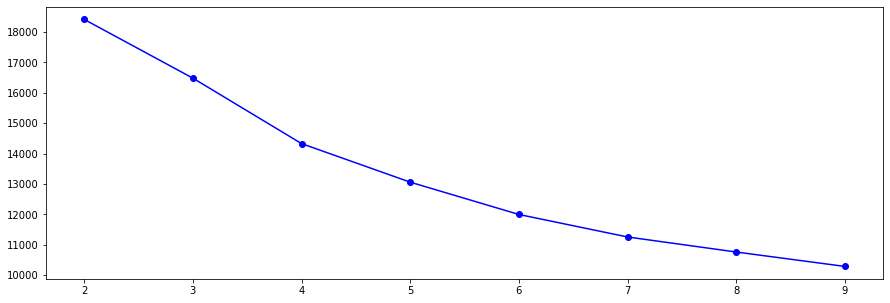

In [25]:
##creating a dataframe of number of clusters and cluster errors
cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors': cluster_errors})

#Elbow pt.
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'], cluster_df['cluster_errors'], marker='o', color = 'b')
plt.show()

In [26]:
##Applying KMeans clustering for the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state =100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [27]:
label = pd.DataFrame(kmeans.labels_,columns=['Label'])
df['label']= label
df

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,kids,TotalAcceptedCmp,Age,label
0,1957,2,0,58138.0,58,0,1617,25,0,1,66,0
1,1954,2,0,46344.0,38,0,27,6,2,0,69,1
2,1965,2,1,71613.0,26,0,776,21,0,0,58,0
3,1984,2,1,26646.0,26,0,53,8,1,0,39,2
4,1981,4,1,58293.0,94,0,422,19,1,0,42,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,1,61223.0,46,0,1341,18,1,0,56,0
2236,1946,4,1,64014.0,56,0,444,22,3,1,77,1
2237,1981,2,0,56981.0,91,0,1241,19,0,1,42,0
2238,1956,3,1,69245.0,8,0,843,23,1,0,67,1


In [28]:
df['label'].value_counts(normalize =True)*100

2    40.357143
1    30.000000
0    29.642857
Name: label, dtype: float64

In [29]:
df[df['label']==2]['Income'].mean()

34841.87279959106

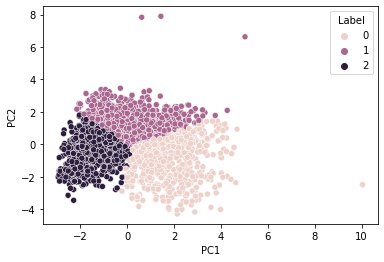

In [38]:
kmeans_df = pca_df.join(label)
kmeans_df.head()
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue ='Label',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

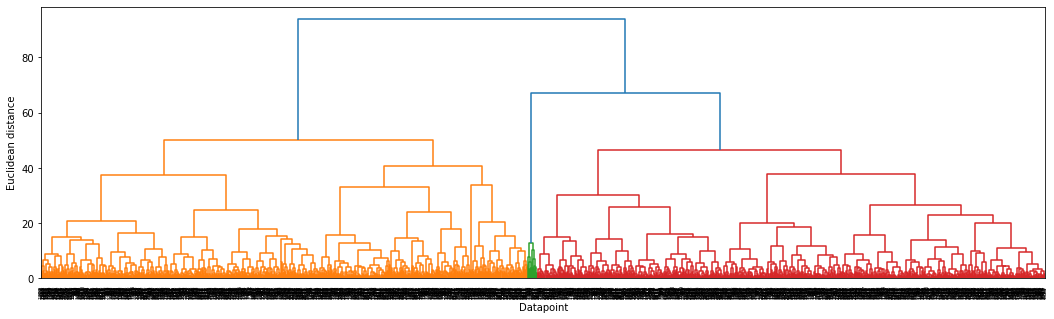

In [37]:
plt.figure(figsize =[18,5])
merg = linkage(scaled_features,method = 'ward')
dendrogram(merg, leaf_rotation =90,)
plt.xlabel('Datapoint')
plt.ylabel('Euclidean distance')
plt.show()

In [33]:
from sklearn.metrics import silhouette_score

In [34]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features)
    labels = hier.fit_predict(scaled_features)
    print(i,silhouette_score(scaled_features,labels))

2 0.18251643960509145
3 0.19170837375415475
4 0.1618530239796801
5 0.109673695121711
6 0.11199144836759573
7 0.10721889323967057
8 0.1095978514535108
9 0.11051851408201324
10 0.1099392903367693
11 0.1124291506540472
12 0.0986235394628454
13 0.10492511211647115
14 0.10297461874658936


In [35]:
##Building hierarchical clustering model using the optimal clusters as 3 using original data
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity ='euclidean', linkage ='ward')
hie_cluster_model =hie_cluster.fit(scaled_features)

In [36]:
df_label1= pd.DataFrame(hie_cluster_model.labels_, columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,1


In [39]:
df_hier=df1.join(df_label1)
df_hier.head()

,Year_Birth,Education,Marital_Status,Income,Recency,Complain,Total_Expenses,Num_Total_Purchases,kids,TotalAcceptedCmp,Age,Labels
0,1957,2,0,58138.0,58,0,1617,25,0,1,66,0
1,1954,2,0,46344.0,38,0,27,6,2,0,69,1
2,1965,2,1,71613.0,26,0,776,21,0,0,58,0
3,1984,2,1,26646.0,26,0,53,8,1,0,39,1
4,1981,4,1,58293.0,94,0,422,19,1,0,42,1


### Visualization and Interpretation of results

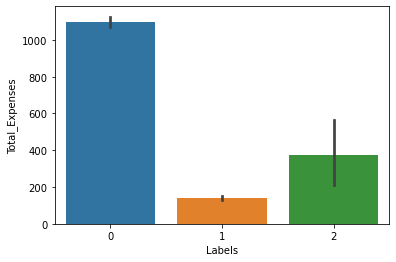

In [40]:
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

In [47]:
##The total Expenses is much higher than cluster 1 and 2

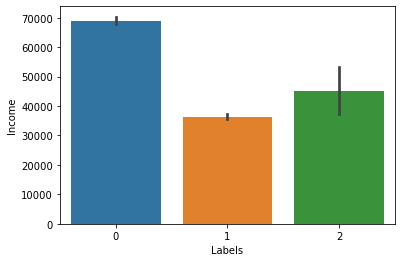

In [44]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

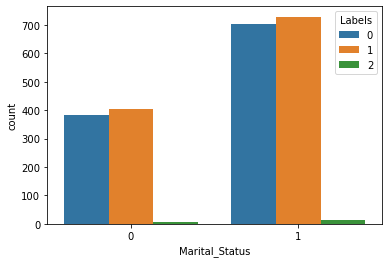

In [45]:
sns.countplot(df_hier['Marital_Status'],hue ='Labels', data = df_hier)
plt.show()

In [42]:
##We can conclude that the customers belong to cluster 0 does maximum purchases, has spend max amount and have max income Where customers belong to cluster 1 has the least Total expenses min balance and does min purchases compared to two clusters

-----
## Happy Learning
-----